# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [65]:
#Read the mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [66]:
# Read the study data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [67]:
# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID



array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_df = clean_df["Drug Regimen"].value_counts()
#bar_df = bar_df.set_index("Drug Regimen")
bar_df.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

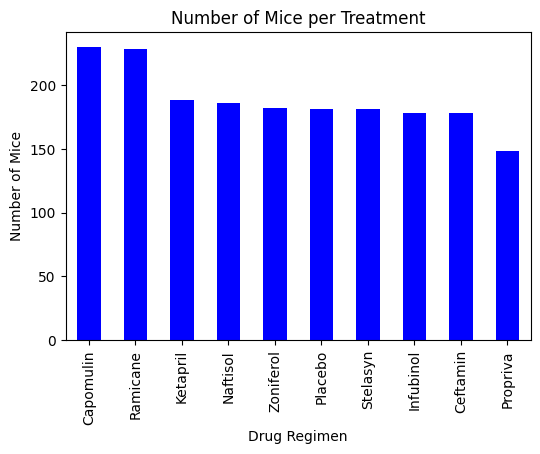

In [75]:
bar_df.plot(kind="bar",color="blue",figsize=(6,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()


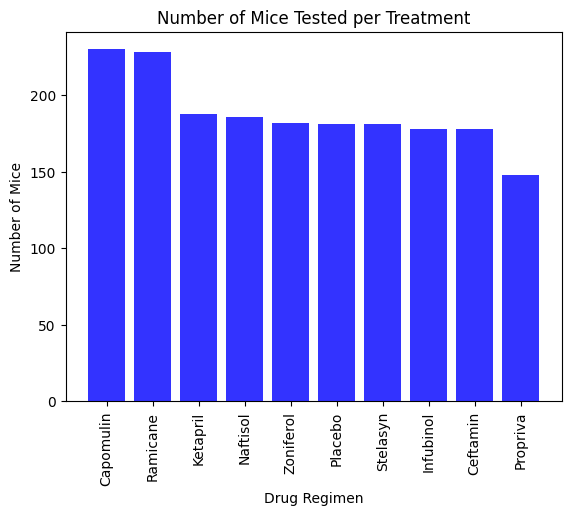

In [76]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis =bar_df.index.values
y_axis = bar_df.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

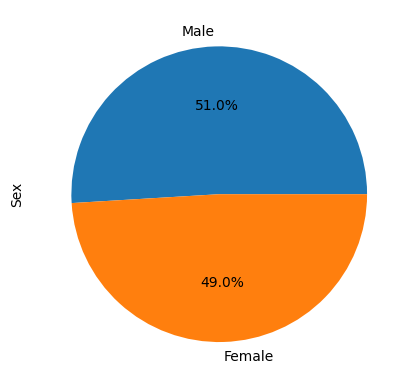

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df=clean_df["Sex"].value_counts()
mice_df=pie_df.plot(kind="pie",autopct="%1.1f%%")
plt.show()

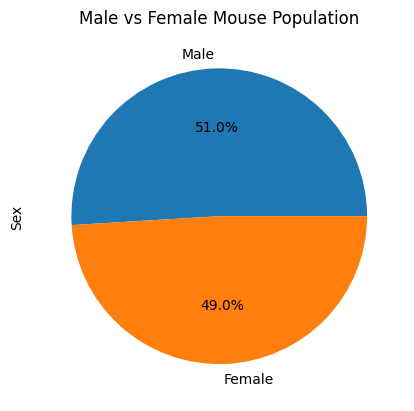

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = pie_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
infubinol_df =  clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
ceftamin_df= clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_box = capomulin_merge["Tumor Volume (mm3)"]
ramicane_box = ramicane_merge["Tumor Volume (mm3)"]
infubinol_box = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_box=ceftamin_merge["Tumor Volume (mm3)"]


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
quartiles =capomulin_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [91]:
quartiles =ramicane_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [92]:
infubinol_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 31.56046955
The upper quartile of Infubinol tumors: 40.65900627
The interquartile range of Infubinol tumors: 9.098536719999998
The median of Infubinol tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [93]:
ceftamin_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin 
      tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 31.56046955
The upper quartile of CeftaminInfubinol tumors: 40.65900627
The interquartile range of Ceftamin tumors: 9.098536719999998
The median of Ceftamin tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


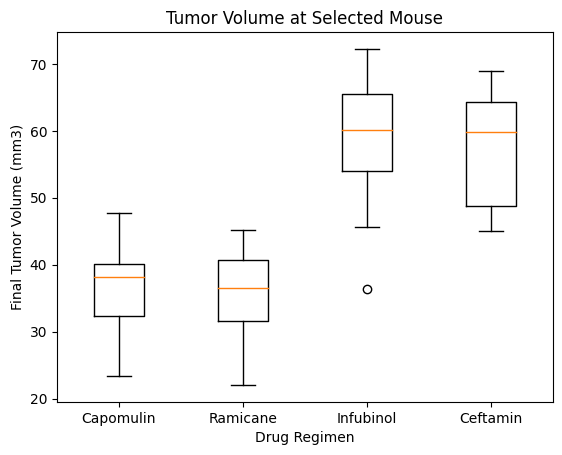

In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
data_to_plot = [capomulin_box,ramicane_box,infubinol_box, ceftamin_box]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

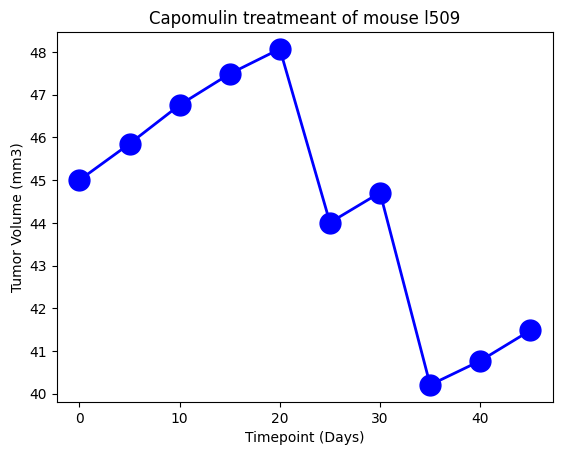

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

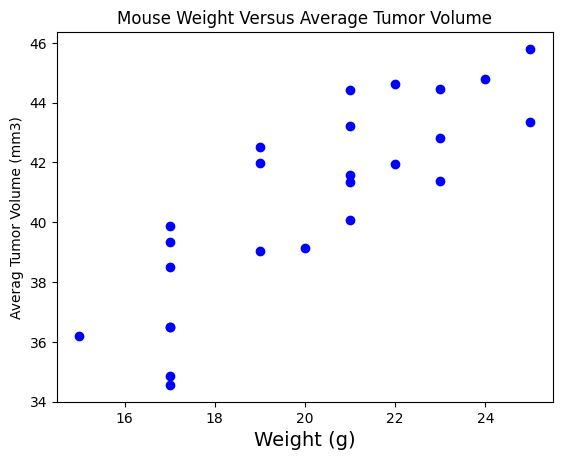

In [95]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


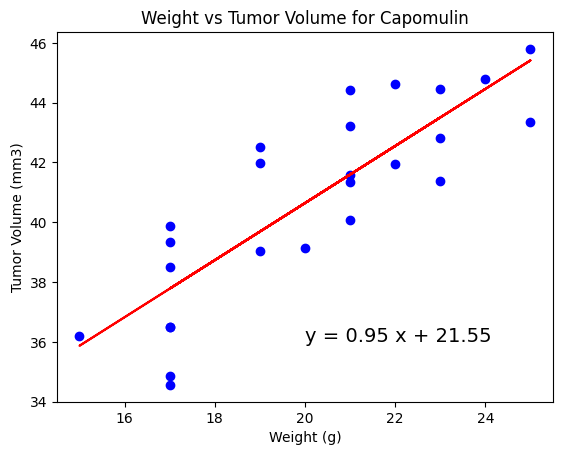

In [99]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()